In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
df = pd.read_csv('./save/ipsc_perturbation_sampling_search.csv', index_col = 0)#.iloc[6:]
df_oksm = pd.read_csv('./save/ipsc_perturbation_sampling_search_oksm.csv', index_col = 0)

In [135]:
oksm_mask = ['SOX2' in i or'KLF4' in i or 'MYC' in i or 'POU5F1'in i or 'NANOG'in i for i in df.index.tolist()]
oksm_mask2 = [sum(gene in i for gene in ['SOX2', 'KLF4', 'MYC', 'POU5F1', 'NANOG']) >= 2 for i in df.index.tolist()]
np.sum(oksm_mask)

2

In [136]:
df.shape

(100, 12)

In [137]:
for t in ['euclid_distance', 'pearson_corr']:
    order = []
    for time in ['D0-fm','D4-fm','D8-fm','D20-nr','P3-nr','P20-nr']:
        order.append(f'{t}_{time}')
    #print(df.loc[:,order].round(3).head(10).to_latex(index=True, float_format=f"%.3f"))
df.loc[:,order].round(3).head(10)

,pearson_corr_D0-fm,pearson_corr_D4-fm,pearson_corr_D8-fm,pearson_corr_D20-nr,pearson_corr_P3-nr,pearson_corr_P20-nr
ZNF471_ICAM1_NR4A3,0.871,0.871,0.871,0.871,0.871,0.871
ZNF212_NR1H3_ZNF282,0.875,0.875,0.875,0.875,0.875,0.875
TAF9B_ZBTB9_MNAT1,0.868,0.868,0.868,0.868,0.868,0.868
PRAM1_BPNT1_LGALS9,0.871,0.871,0.871,0.871,0.871,0.871
PSMA6_PPP3CA_NRIP1,0.871,0.871,0.871,0.871,0.871,0.871
ZNF329_LIN28A_DNMT3B,0.864,0.864,0.864,0.864,0.864,0.864
TSC2_MALT1_ZNF614,0.879,0.879,0.879,0.879,0.879,0.879
HOXA7_ZNF219_MNAT1,0.866,0.866,0.866,0.866,0.866,0.866
TRIM26_ESRRB_BACH2,0.877,0.877,0.877,0.877,0.877,0.877
MAFG_THRA_ZIC1,0.867,0.867,0.867,0.867,0.867,0.867


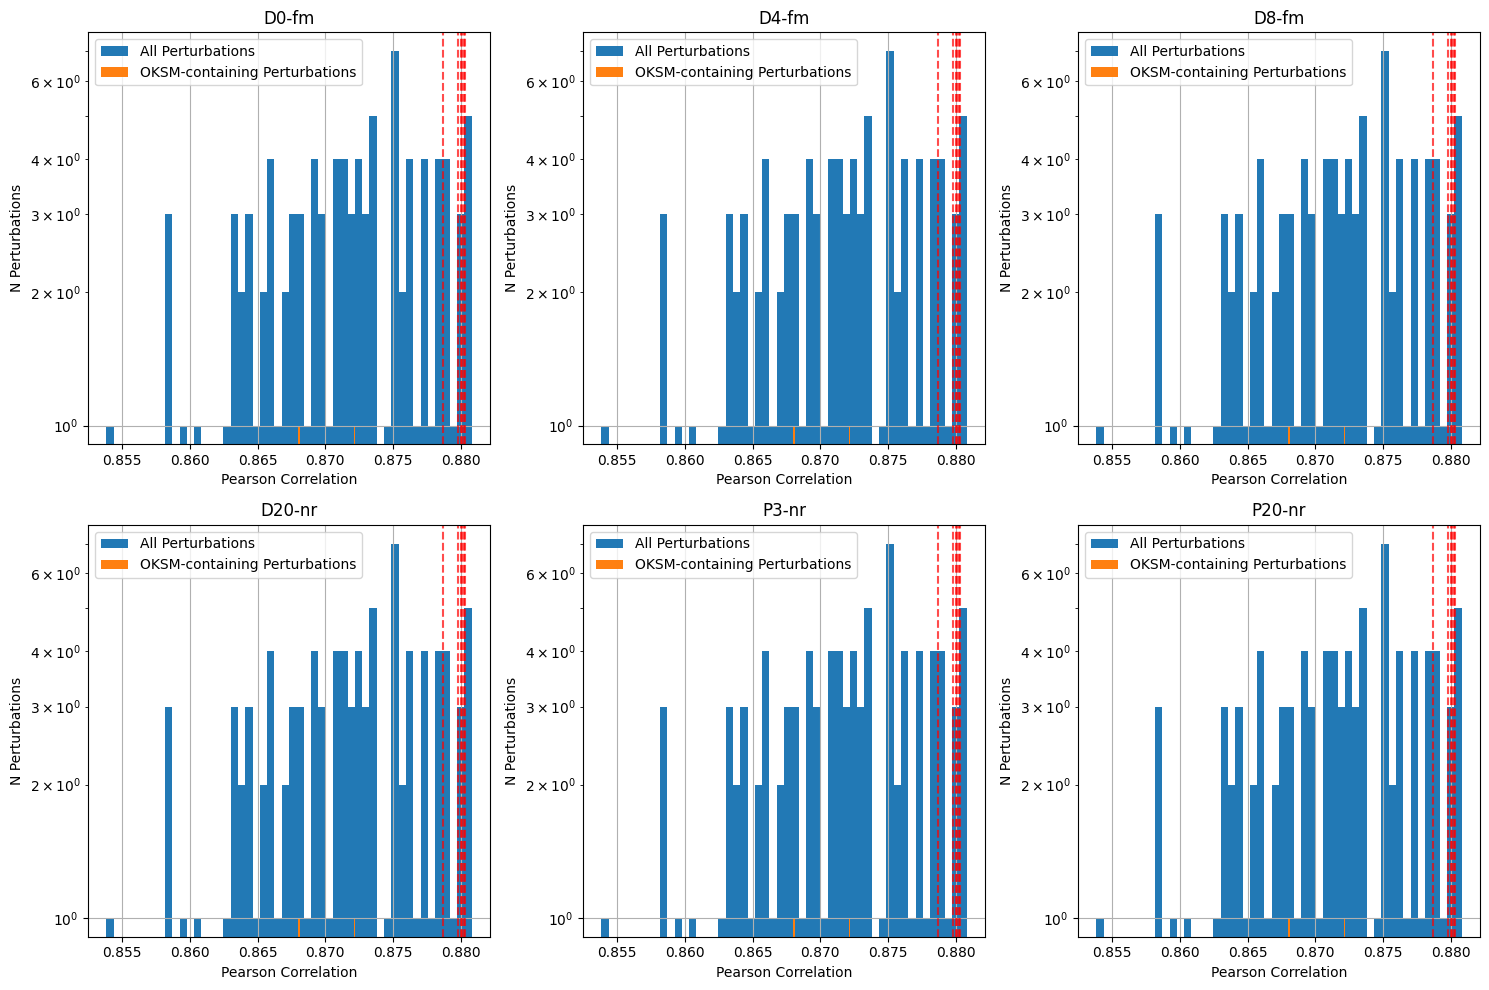

In [138]:
# Parameters
sim_type = 'pearson_corr'
repr_points = ['D0-fm', 'D4-fm', 'D8-fm', 'D20-nr', 'P3-nr', 'P20-nr']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows and 3 columns
axes = axes.flatten()  # Flatten to easily iterate over axes

# Loop over each representation point and plot histogram
for i, repr_point in enumerate(repr_points):
    ax = axes[i]  # Get the specific subplot axis
    
    # Plot histograms on the specific axis
    df.loc[:, f'{sim_type}_{repr_point}'].hist(bins=50, log=True, ax=ax, alpha=0.99, label='All Perturbations')
    #df_oksm.loc[:, f'{sim_type}_{repr_point}'].hist(bins=50, log=True, ax=ax, alpha=0.99, label='All Perturbations')
    df.loc[oksm_mask, f'{sim_type}_{repr_point}'].hist(bins=50, log=True, ax=ax, alpha=0.99, label='OKSM-containing Perturbations')

    # Plot df_oksm as vertical dashed red lines with labels
    for value in df_oksm[f'{sim_type}_{repr_point}']:
        ax.axvline(value, color='red', linestyle='--', alpha=0.7)
    
    # Set labels and title
    ax.set_xlabel('Pearson Correlation')
    ax.set_ylabel('N Perturbations')
    ax.set_title(f'{repr_point}')
    ax.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig(f'./save/pert_ipsc_corr_panel_{sim_type}.png',bbox_inches='tight')
plt.show()

Text(0, 0.5, 'N Perturbations')

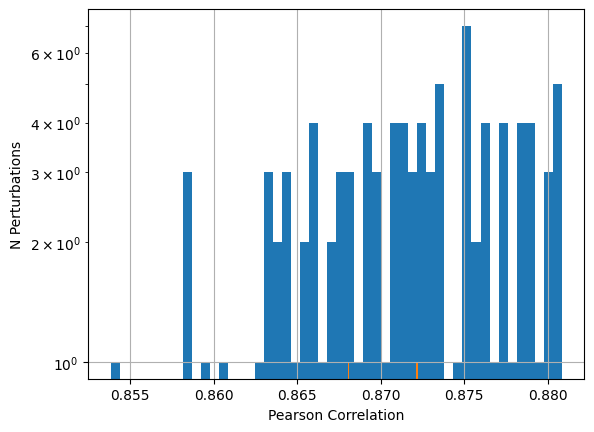

In [139]:
sim_type = 'pearson_corr'
repr_point = 'D8-fm'
df.loc[:, f'{sim_type}_{repr_point}'].hist(bins = 50,log=True)
df.loc[oksm_mask, f'{sim_type}_{repr_point}'].hist(bins = 50,log=True)
plt.xlabel('Pearson Correlation')
plt.ylabel('N Perturbations')
#plt.savefig('./d0_pert_corr.pdf',bbox_inches='tight')
#df_oksm.loc[:, f'{sim_type}_{repr_point}'].hist(bins = 50)
#df.loc[oksm_mask, f'{sim_type}_{repr_point}']#.hist(bins = 50, density=False)


<Axes: xlabel='Pearson Correlation', ylabel='N Perturbations'>

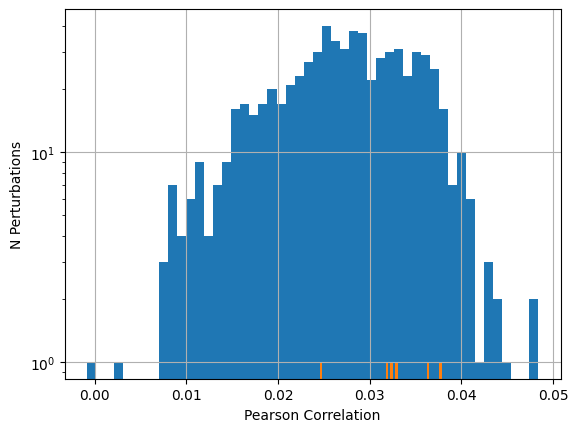

In [61]:
sim_type = 'pearson_corr'
repr_point = 'D8-fm'
df.loc[:, f'{sim_type}_{repr_point}'].hist(bins = 50,log=True)
plt.xlabel('Pearson Correlation')
plt.ylabel('N Perturbations')
#plt.savefig('./d0_pert_corr.pdf',bbox_inches='tight')
df_oksm.loc[:, f'{sim_type}_{repr_point}'].hist(bins = 50)
#df.loc[oksm_mask, f'{sim_type}_{repr_point}']#.hist(bins = 50, density=False)


In [62]:
df.sort_values(by=f'{sim_type}_{repr_point}')

,euclid_distance_D0-fm,pearson_corr_D0-fm,euclid_distance_D20-nr,pearson_corr_D20-nr,euclid_distance_P20-nr,pearson_corr_P20-nr,euclid_distance_D8-fm,pearson_corr_D8-fm,euclid_distance_D4-fm,pearson_corr_D4-fm,euclid_distance_P3-nr,pearson_corr_P3-nr
ZNF71_KNTC1_RBM20,7.645055,0.000558,8.128983,0.006126,8.769015,0.007467,8.054731,-0.000835,7.243652,0.010924,8.192351,0.010170
PHF21A_REV1_STK16,7.554009,0.006295,8.030382,0.012566,8.667475,0.015333,7.961844,0.002534,7.148118,0.017967,8.094257,0.015059
SETDB2_LEF1_ZHX2,7.749737,0.010426,8.238961,0.008134,8.881880,0.010455,8.162502,0.007302,7.351394,0.022671,8.301338,0.011791
ZNF48_GREM1_FBN1,7.671259,0.005887,8.146914,0.009134,8.787804,0.011839,8.079970,0.007336,7.267371,0.017018,8.209618,0.013278
FAAP24_JMY_ZNF830,7.596576,0.009741,8.078567,0.007535,8.717557,0.010282,8.004995,0.007864,7.193543,0.023348,8.141921,0.010877
...,...,...,...,...,...,...,...,...,...,...,...,...
IRX4_PARP12_ATR,7.502806,0.045713,7.976576,0.031104,8.612230,0.034555,7.908570,0.044071,7.095465,0.057661,8.040416,0.034222
ZNF440_MYC_HDAC3,7.572379,0.053204,8.052991,0.029146,8.690976,0.031041,7.980216,0.044120,7.168684,0.056750,8.116374,0.033058
MBD3_ZNF214_ZNF599,7.592256,0.049992,8.077043,0.030948,8.715914,0.033289,8.001284,0.044932,7.190549,0.056869,8.140423,0.033919
TP73_TERF1_ESRRG,7.543705,0.052923,8.024170,0.032555,8.661319,0.033887,7.951036,0.048030,7.139491,0.057186,8.087698,0.036608


In [63]:
df.sort_values(by=f'{sim_type}_{repr_point}').tail(5).index

Index(['IRX4_PARP12_ATR', 'ZNF440_MYC_HDAC3', 'MBD3_ZNF214_ZNF599',
       'TP73_TERF1_ESRRG', 'TOX3_ZNF764_PUM3'],
      dtype='object')

In [64]:
f = ['eucl' in i for i in df.columns]

In [87]:
rep_order = ['pearson_corr_D0-fm', 'pearson_corr_D4-fm', 'pearson_corr_D8-fm', 'pearson_corr_D20-nr','pearson_corr_P3-nr','pearson_corr_P20-nr']
rep_order_eu = ['euclid_distance_D0-fm', 'euclid_distance_D4-fm', 'euclid_distance_D8-fm', 'euclid_distance_D20-nr','euclid_distance_P3-nr','euclid_distance_P20-nr']
#rep_order = ['pearson_corr_D0-fm', 'pearson_corr_D8-fm', 'pearson_corr_D20-nr','pearson_corr_P20-nr']

<Axes: >

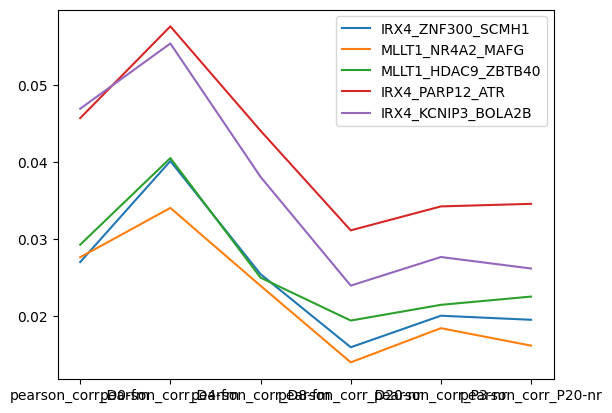

In [93]:
df.sort_values(by = ['euclid_distance_D0-fm', 'euclid_distance_P20-nr'], ascending=True).loc[:,rep_order].head().T.plot()

Text(0, 0.5, 'Pearson Correlation')

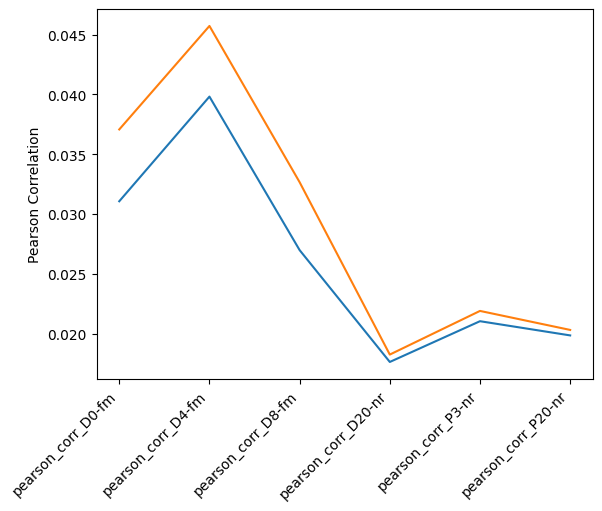

In [66]:
df.loc[:,rep_order].mean().T.plot()
df_oksm.loc[:,rep_order].mean().T.plot()
plt.xticks(rotation=45,ha='right')
plt.ylabel('Pearson Correlation')
#plt.savefig('./rand10perts_corr.pdf',bbox_inches='tight')

#plt.xticks(rotation=45,ha='right')
#plt.ylabel('Pearson Correlation')
#plt.savefig('./OKSMperts_corr.pdf',bbox_inches='tight');

In [67]:
df.corr().loc[~np.array(f),~np.array(f)]

,pearson_corr_D0-fm,pearson_corr_D20-nr,pearson_corr_P20-nr,pearson_corr_D8-fm,pearson_corr_D4-fm,pearson_corr_P3-nr
pearson_corr_D0-fm,1.000000,0.587203,0.594213,0.940195,0.943811,0.571511
pearson_corr_D20-nr,0.587203,1.000000,0.990118,0.669075,0.601605,0.992272
pearson_corr_P20-nr,0.594213,0.990118,1.000000,0.666365,0.623885,0.978996
pearson_corr_D8-fm,0.940195,0.669075,0.666365,1.000000,0.929842,0.669647
pearson_corr_D4-fm,0.943811,0.601605,0.623885,0.929842,1.000000,0.586786
pearson_corr_P3-nr,0.571511,0.992272,0.978996,0.669647,0.586786,1.000000


In [68]:
df.loc[:,~np.array(f)].sort_values(by='pearson_corr_P20-nr', ascending=False).head(10).index

Index(['HMGB2_BNC1_TRIB3', 'IRX4_PARP12_ATR', 'TP73_TERF1_ESRRG',
       'SCML4_TGFB1I1_ATR', 'MBD3_ZNF214_ZNF599', 'ZNF596_RFX8_PURG',
       'TOX3_ZNF764_PUM3', 'PGR_SUPT5H_TRIM8', 'ZNF277_EMX2_TOP2A',
       'ZSCAN2_PRKCB_ATF4'],
      dtype='object')

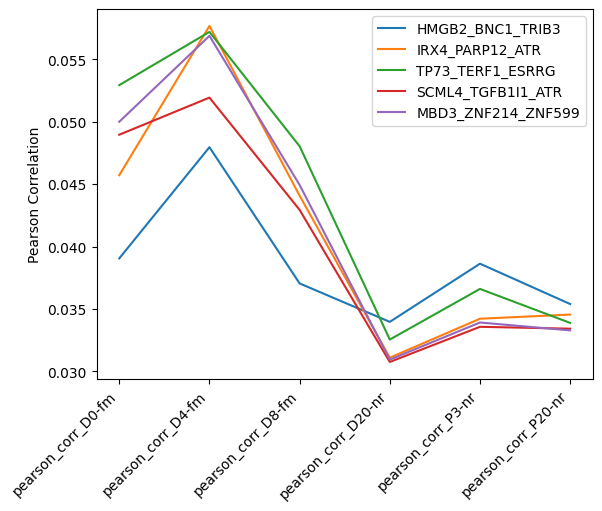

In [69]:
df.loc[:,~np.array(f)].sort_values(by='pearson_corr_P20-nr', ascending=False).head(5).loc[:,rep_order].T.plot()
plt.xticks(rotation=45,ha='right')
plt.ylabel('Pearson Correlation');

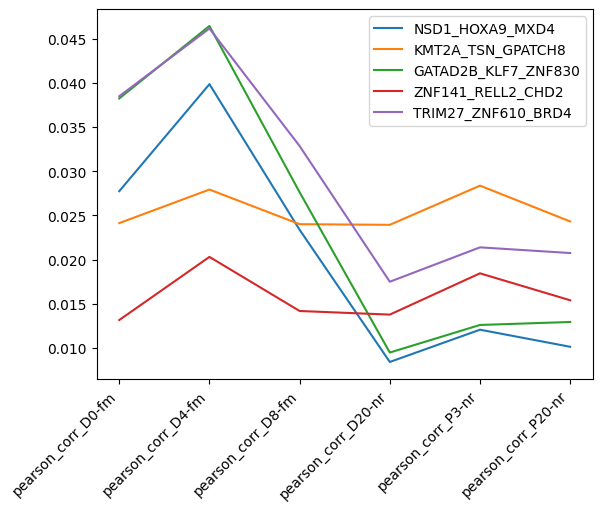

In [79]:
df_m = df.copy()
df_m['pearson_corr_D0-fm'] = - df_m['pearson_corr_D0-fm'] 
df_m = df_m.sort_values(by=['pearson_corr_D0-fm', 'pearson_corr_P20-nr'], ascending=False)
df.loc[:,rep_order].head(5).T.plot()
plt.xticks(rotation=45, ha='right');

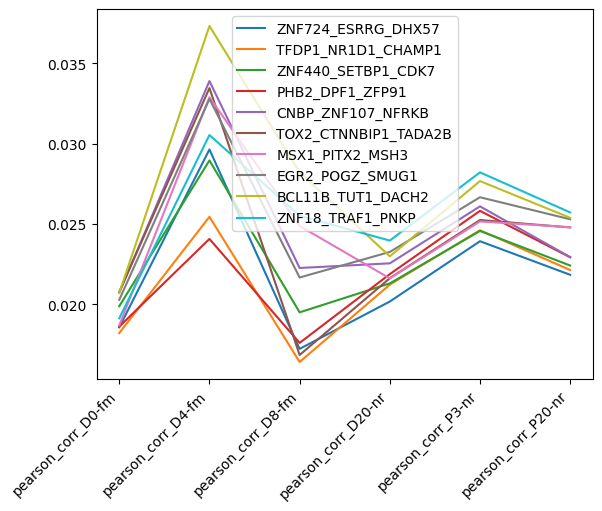

In [85]:
df.loc[:,rep_order].sort_values('pearson_corr_D0-fm').head(100).sort_values(by='pearson_corr_P20-nr').tail(10).T.plot()
plt.xticks(rotation=45, ha='right');